In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import decision tree classifier
from sklearn.tree import DecisionTreeClassifier
# import kneighbour classifier 
from sklearn.neighbors import  KNeighborsClassifier
# import perceptron
from sklearn.linear_model import Perceptron
#import naive_bayes 
from sklearn.naive_bayes import MultinomialNB
#import random forest
from sklearn.ensemble import RandomForestClassifier
# import train_test_split
from sklearn.model_selection import train_test_split
# import accuracy score
from sklearn.metrics import accuracy_score

In [2]:
# load clinical decision support system datset
dataset = pd.read_csv("data2.csv")

In [3]:
#print dataset
print(dataset)

      itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           1          1                     1                    0   
1           0          1                     1                    0   
2           1          0                     1                    0   
3           1          1                     0                    0   
4           1          1                     1                    0   
...       ...        ...                   ...                  ...   
4915        0          0                     0                    0   
4916        0          1                     0                    0   
4917        0          0                     0                    0   
4918        0          1                     0                    0   
4919        0          1                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0           0             0        0         

In [4]:
dataset.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
## Preprocessing
# Dimensions of the dataset (rows,columns)
#Shape
# dataset is 4920 rows ,133 columns 
print(dataset.shape)

(4920, 133)


In [6]:
#Peek at the data
#head
# show first 20 rows
print(dataset.head())

   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   
3       0           0             0        0                 0  ...   
4       0           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             

In [7]:
#return a tuple representing the dimensionality
#number of elements 
print(dataset.size)
print(dataset.shape)

654360
(4920, 133)


In [8]:
#Check types for all the columns
print(dataset.dtypes)

itching                  int64
skin_rash                int64
nodal_skin_eruptions     int64
continuous_sneezing      int64
shivering                int64
                         ...  
inflammatory_nails       int64
blister                  int64
red_sore_around_nose     int64
yellow_crust_ooze        int64
prognosis               object
Length: 133, dtype: object


In [9]:
#number of dimensions
print(dataset.ndim)

2


In [10]:
# x data
#independent_variable
x = dataset.drop(['prognosis'], axis=1)
print("X Shape is ",x.shape)

X Shape is  (4920, 132)


In [11]:
# y Data
#target
y = dataset['prognosis']
print("y Shape is ",y.shape)

y Shape is  (4920,)


In [12]:
dataset["prognosis"].value_counts(normalize=True)

Fungal infection                           0.02439
Hepatitis C                                0.02439
Hepatitis E                                0.02439
Alcoholic hepatitis                        0.02439
Tuberculosis                               0.02439
Common Cold                                0.02439
Pneumonia                                  0.02439
Dimorphic hemmorhoids(piles)               0.02439
Heart attack                               0.02439
Varicose veins                             0.02439
Hypothyroidism                             0.02439
Hyperthyroidism                            0.02439
Hypoglycemia                               0.02439
Osteoarthristis                            0.02439
Arthritis                                  0.02439
(vertigo) Paroymsal  Positional Vertigo    0.02439
Acne                                       0.02439
Urinary tract infection                    0.02439
Psoriasis                                  0.02439
Hepatitis D                    

In [13]:
# check any null values 
print(dataset.isnull().sum());

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64


<AxesSubplot:>

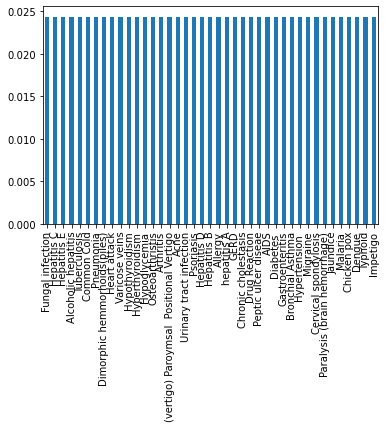

In [14]:
#Dataset Visualization
# by using bar chart
#Each number of diseases having the same percentages 
dataset["prognosis"].value_counts(normalize=True).plot.bar()


(array([[4242.,    0.,    0., ...,    0.,    0.,  678.],
        [4134.,    0.,    0., ...,    0.,    0.,  786.],
        [4812.,    0.,    0., ...,    0.,    0.,  108.],
        ...,
        [4806.,    0.,    0., ...,    0.,    0.,  114.],
        [4806.,    0.,    0., ...,    0.,    0.,  114.],
        [4806.,    0.,    0., ...,    0.,    0.,  114.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 132 BarContainer objects>)

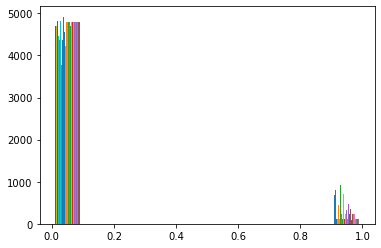

In [15]:
##plotdata
plt.hist(x)

In [16]:
#Split dataset into  70% training set and 30% testing set   
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [17]:
#Build models
classifierDT = DecisionTreeClassifier(max_leaf_nodes=30, random_state=0)
classifierknn = KNeighborsClassifier(n_neighbors=3)
classifierperc = Perceptron(max_iter=10, random_state=0)
classifierMultinomialnb=MultinomialNB()
classifierRandomForest=RandomForestClassifier(n_estimators=9)

67.17980295566502


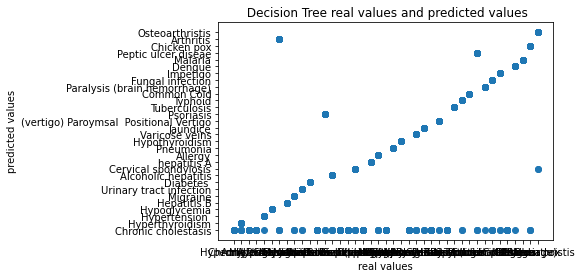

<Figure size 1152x648 with 0 Axes>

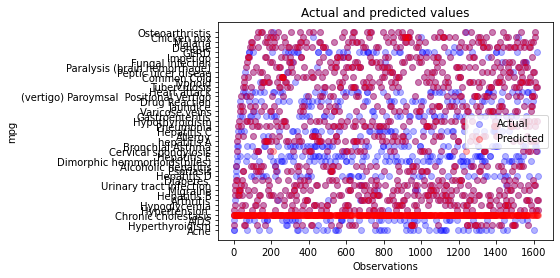

In [18]:
##decisionTree

classifierDT.fit(x_train, y_train)
y_predictiedDt = classifierDT.predict(x_test)
accDT = accuracy_score(y_test, y_predictiedDt)*100

#Evaluate Predictions
print(accDT)

##scatterDt
fig, ax = plt.subplots()
ax.scatter(y_test,y_predictiedDt)
ax.set_title(' Decision Tree real values and predicted values')
ax.set(xlabel='real values', ylabel='predicted values')

##scatterDtDots
fig = plt.figure(figsize=(16,9))
fig, ax = plt.subplots()
ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_predictiedDt.size), y=y_predictiedDt, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('mpg')
plt.legend()
plt.show()

100.0


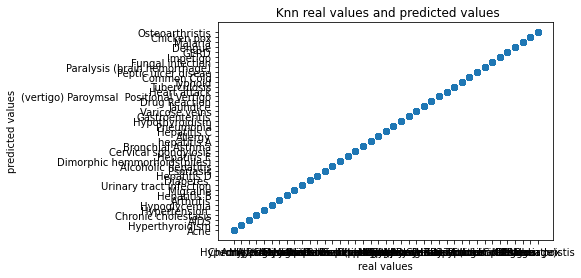

<Figure size 1152x648 with 0 Axes>

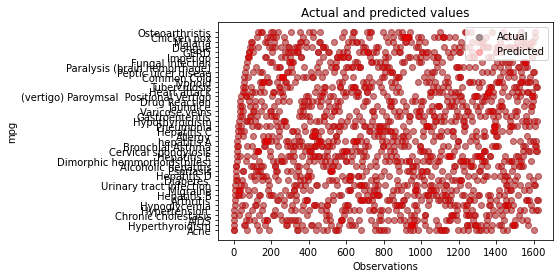

In [19]:
##KNN
classifierknn.fit(x_train, y_train)
y_predictknn = classifierknn.predict(x_test)
accknn = accuracy_score(y_predictknn , y_test)*100
print(accknn)

##scatterknn
fig, ax = plt.subplots()
ax.scatter(y_test,y_predictknn)
ax.set_title(' Knn real values and predicted values')
ax.set(xlabel='real values', ylabel='predicted values')


##scatterknnDots
fig = plt.figure(figsize=(16,9))
fig, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'black', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_predictknn.size), y=y_predictknn, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('mpg')
plt.legend()
plt.show()

100.0


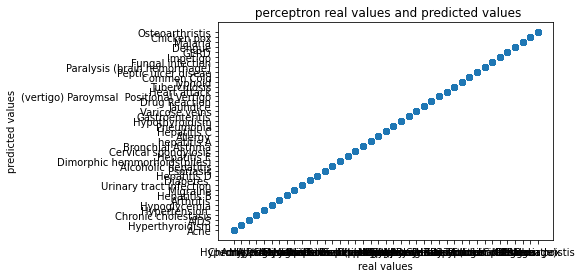

<Figure size 1152x648 with 0 Axes>

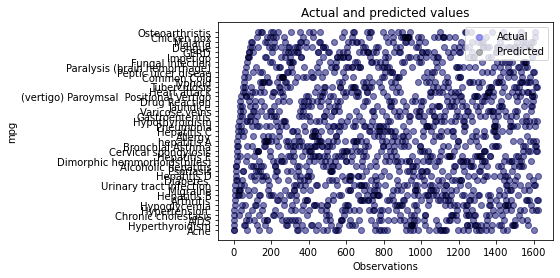

In [20]:
##perceptron
classifierperc.fit(x_train, y_train)
y_predictiedper = classifierperc.predict(x_test)
accper = accuracy_score(y_test,y_predictiedper )*100

#Evaluate Predictions
print(accper)

##scatterper
fig, ax = plt.subplots()
ax.scatter(y_test,y_predictiedper)
ax.set_title(' perceptron real values and predicted values')
ax.set(xlabel='real values', ylabel='predicted values')

##scatterPerDots
fig = plt.figure(figsize=(16,9))
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_predictiedper.size), y=y_predictiedper, c = 'black', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('mpg')
plt.legend()
plt.show()

100.0


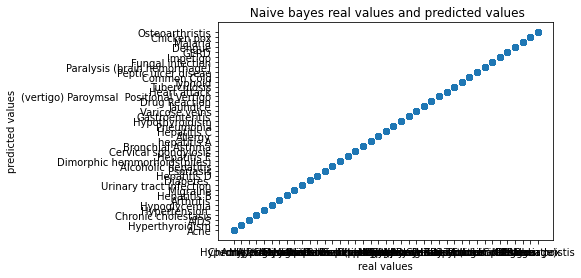

<Figure size 1152x648 with 0 Axes>

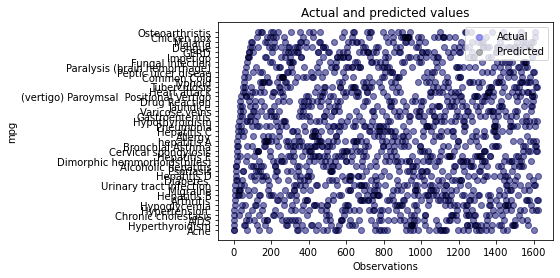

In [21]:
## Naive bayes
classifierMultinomialnb.fit(x_train, y_train)
y_predictnb = classifierMultinomialnb.predict(x_test)
accnb = accuracy_score(y_predictnb , y_test)*100
#Evaluate Predictions
print(accnb)

##scatter Naive bayes
fig, ax = plt.subplots()
ax.scatter(y_test,y_predictnb)
ax.set_title(' Naive bayes real values and predicted values')
ax.set(xlabel='real values', ylabel='predicted values')


##scatter Naive bayes Dots
fig = plt.figure(figsize=(16,9))
fig, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_predictnb.size), y=y_predictnb, c = 'black', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('mpg')
plt.legend()
plt.show()

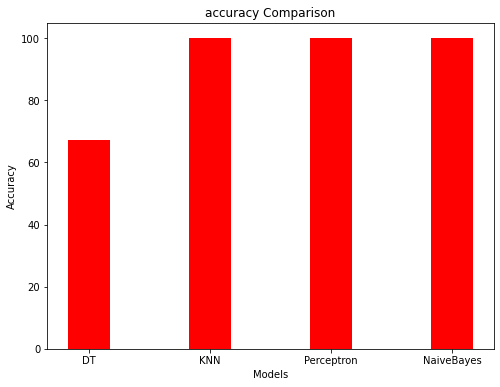

In [22]:
##parplot
names=['DT','KNN','Perceptron','NaiveBayes']
valuse=[accDT,accknn,accper,accnb]

fig = plt.figure(figsize=(8,6))
ax = plt.axes()
ax.bar(names, valuse, color='red', width = 0.35);
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('accuracy Comparison');
plt.show()